In [285]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.integrate import quad
import matplotlib.patches as patches
import cv2

In [205]:
def get_wave_updated(data, depth_min, depth_max, smooth=False):
    data = np.array(data).T
    data = np.abs(data)
    # data = np.clip(data, a_min=0, a_max=None)
    data = data[depth_min:depth_max]
    index = np.arange(data.shape[0])[None, :]
    a = index @ data
    b = np.sum(data, axis=0)[None, :]
    c = a / b

    return c

In [192]:
with open("../feature_extractors/us/surrogates.pickle", "rb") as file:
    surrogates = pickle.load(file)

us_all = surrogates["us"]
roi = 300, 1000

In [276]:
window = us_all[5000:6000]

In [288]:
wave = get_wave_updated(window, depth_min=300, depth_max=1000).squeeze()

In [289]:
wave[0]

292.26970954356847

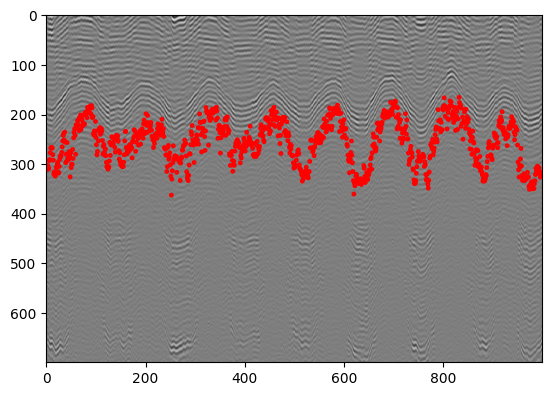

In [290]:
image = window.T[300:1000]

fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')

for i in range(len(wave)):
    circle = patches.Circle((i, wave[i]), 2, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(circle)
    # cv2.circle(image, center=(i, wave[i]), radius=2, color=[255], thickness=2)

plt.show()

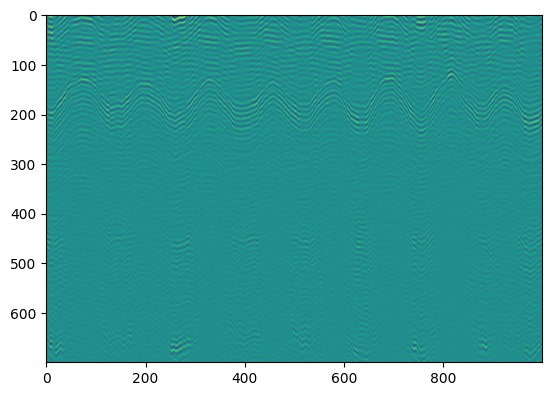

In [280]:
plt.imshow(image)

In [214]:
h = hilbert(us_all.T)

In [215]:
U = np.log(np.abs(h))

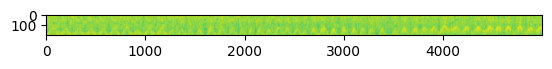

In [227]:
plt.imshow(U[300:500, 5000:10000])

In [262]:
w = get_wave_updated(us_all, 300, 1000)

(0.0, 700.0)

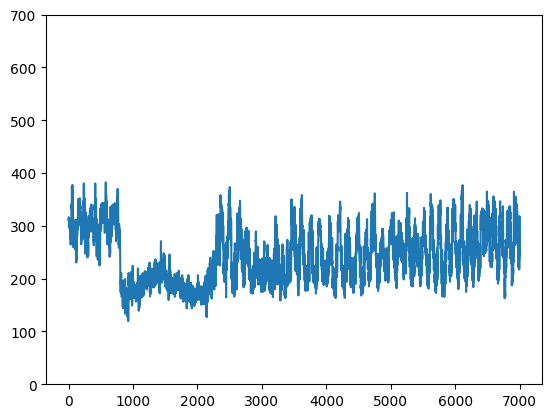

In [267]:
plt.plot(w.squeeze()[:7000])
plt.ylim([0, 700])

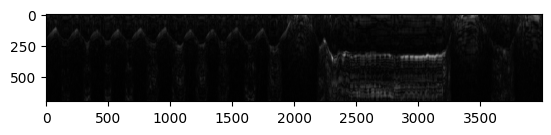

In [261]:
window = us_all.T[300:1000, 20000:24000]
plt.imshow(np.abs(window), cmap="gray")

In [145]:
fft_result = np.fft.fft2(us_all)
phase = np.angle(fft_result)

In [168]:
height, width = phase.shape
v = np.zeros_like(phase)
for i in range(1, width):
    v_i = (phase[:, i] - phase[:, i-1])/2

    v[:, i] = v_i

v = 0.5*19/360 * v

In [169]:
v_window = v[roi[0]:roi[1], 0:1000]

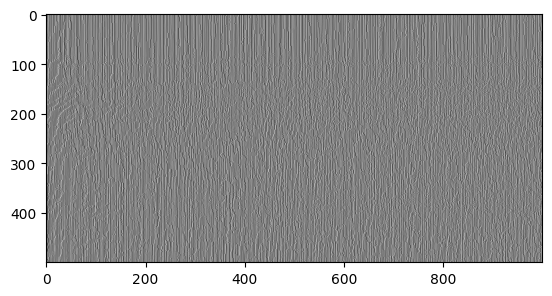

In [199]:
plt.imshow(v[:500, :1000], cmap="gray")

In [293]:
v_r = np.median(v, axis=0)
v_r

array([ 0.        , -0.00170787,  0.03315983, ...,  0.03076129,
       -0.04632439,  0.03315983])

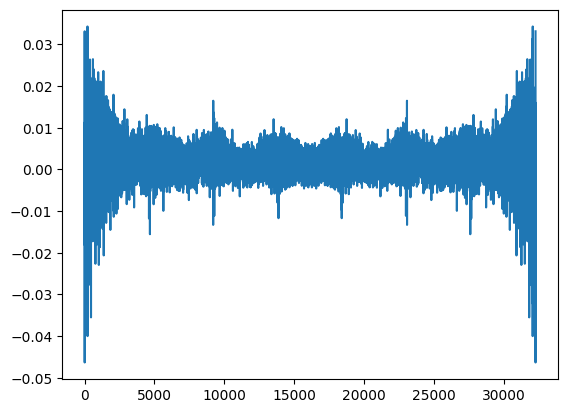

In [294]:
plt.plot(v_r)

In [295]:
waveform = []

for T in range(v_r.shape[0]):
    curr = np.sum(v_r[:T])
    waveform.append(curr)

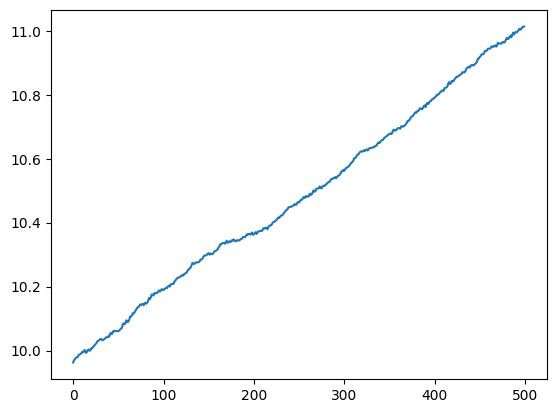

In [297]:
plt.plot(waveform[3000:3500])

In [165]:
magnitude = np.abs(fft_result)

In [167]:
magnitude

array([[2476.83984375, 6158.09751569, 2535.42968941, ...,  388.56295335,
        2535.42968941, 6158.09751569],
       [4754.83078482, 4802.13470807, 2072.69044254, ...,  946.9659769 ,
        1894.76004056, 5178.23899606],
       [3751.85545739, 4382.04156377, 2076.91855546, ...,  815.60849299,
        1633.42977842, 5090.13099615],
       ...,
       [2928.3517625 , 4796.13856151, 1439.18862901, ..., 1144.85514834,
        1921.35924792, 4023.97984765],
       [3751.85545739, 5090.13099615, 1633.42977842, ..., 1187.47483026,
        2076.91855546, 4382.04156377],
       [4754.83078482, 5178.23899606, 1894.76004056, ..., 1216.89059636,
        2072.69044254, 4802.13470807]])